In [248]:
import numpy as np
import os
import re
import tensorflow as tf
import cv2

import skimage.io
from skimage import transform as sktf

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import imresize

In [228]:
annot = np.loadtxt('flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt', dtype=bytes).astype(np.str)
test_data_idx = np.random.choice(len(annot))
test_data = annot[test_data_idx]

In [229]:
print(test_data)

['2958187326.jpg' 'Mini' '2' '58' '38' '435' '206']


In [230]:
img = skimage.io.imread(os.path.join('flickr_logos_27_dataset/flickr_logos_27_dataset_images/', test_data[0]))

(402, 500, 3)


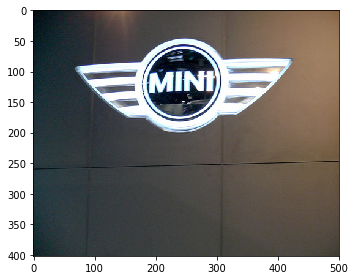

In [231]:
print(img.shape)
skimage.io.imshow(img)

In [232]:
def get_rect(annot):
    return np.array(list(map(lambda x: int(x), annot[3:])))

In [233]:
rect = get_rect(test_data)
print(rect)

[ 58  38 435 206]


In [234]:
def crop_image(img, rect):
    return img[rect[1] : rect[3], rect[0] : rect[2]]

In [235]:
cropped_img = crop_image(img, rect)

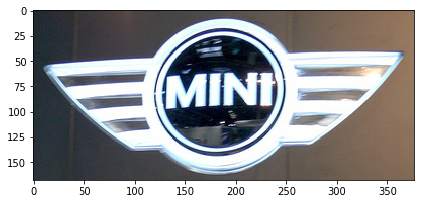

In [236]:
skimage.io.imshow(cropped_img)

In [237]:
# First, cropped logo image is resized
CNN_IN_WIDTH = 64
CNN_IN_HEIGHT = 32

input_img = imresize(cropped_img, (CNN_IN_HEIGHT, CNN_IN_WIDTH), interp='bicubic')

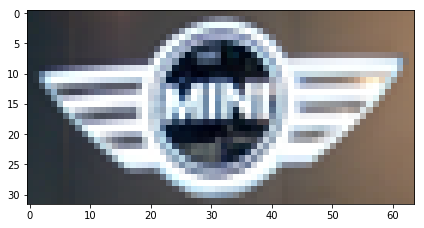

In [238]:
skimage.io.imshow(input_img)

3 5


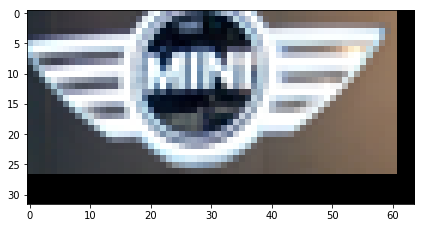

In [249]:
# Augmentation by translation
MAX_WIDTH_RATE = 0.2
MAX_HEIGHT_RATE = 0.2

shift_w_max = CNN_IN_WIDTH * MAX_WIDTH_RATE
shift_h_max = CNN_IN_HEIGHT * MAX_HEIGHT_RATE

shift_w = int(np.ceil(np.random.rand() * shift_w_max))
shift_h = int(np.ceil(np.random.rand() * shift_h_max))
print(shift_w, shift_h)

translation_matrix = sktf.AffineTransform(translation=(shift_w, shift_h))
translated_img = sktf.warp(input_img, translation_matrix)

skimage.io.imshow(translated_img)

8.934717457885956


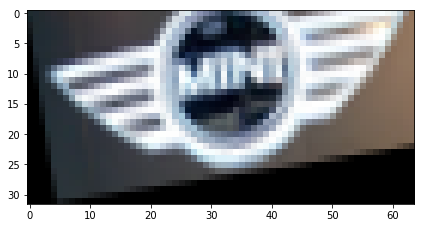

In [260]:
# Augmentation by rotation
MAX_ROT_DEG = 15
MIN_ROT_DEG = -15

rot_deg = np.random.uniform(MIN_ROT_DEG, MAX_ROT_DEG)
print(rot_deg)

rot_rad = rot_deg * np.pi / 180.
rot_matrix = sktf.AffineTransform(rotation=rot_rad)
rotated_img = sktf.warp(input_img, rot_matrix)

skimage.io.imshow(rotated_img)